# 13. 이미지 어그멘테이션의 효과

https://codetorial.net/tensorflow/image_augmentation.html

적은 수의 이미지 데이터를 가지고 Neural Network를 훈련할 때 과적합(overfitting)문제가 발생할 수 있습니다. 과적합이란 훈련에 사용되는 이미지에 과도하게 학습되어서 새로운 이미지를 제대로 인식하지 못하는 현상입니다.

또한 훈련에 사용되는 이미지가 적기 때문에 훈련 과정에서 보지 못한 유형의 이미지를 인식하지 못할 수 있습니다. 예를 들어서, 아래와 같이 훈련 과정에서 왼쪽의 신발들을 사용한 후에 오른쪽 하이힐을 인식하면 신발로 분류하지 못할 수 있습니다.

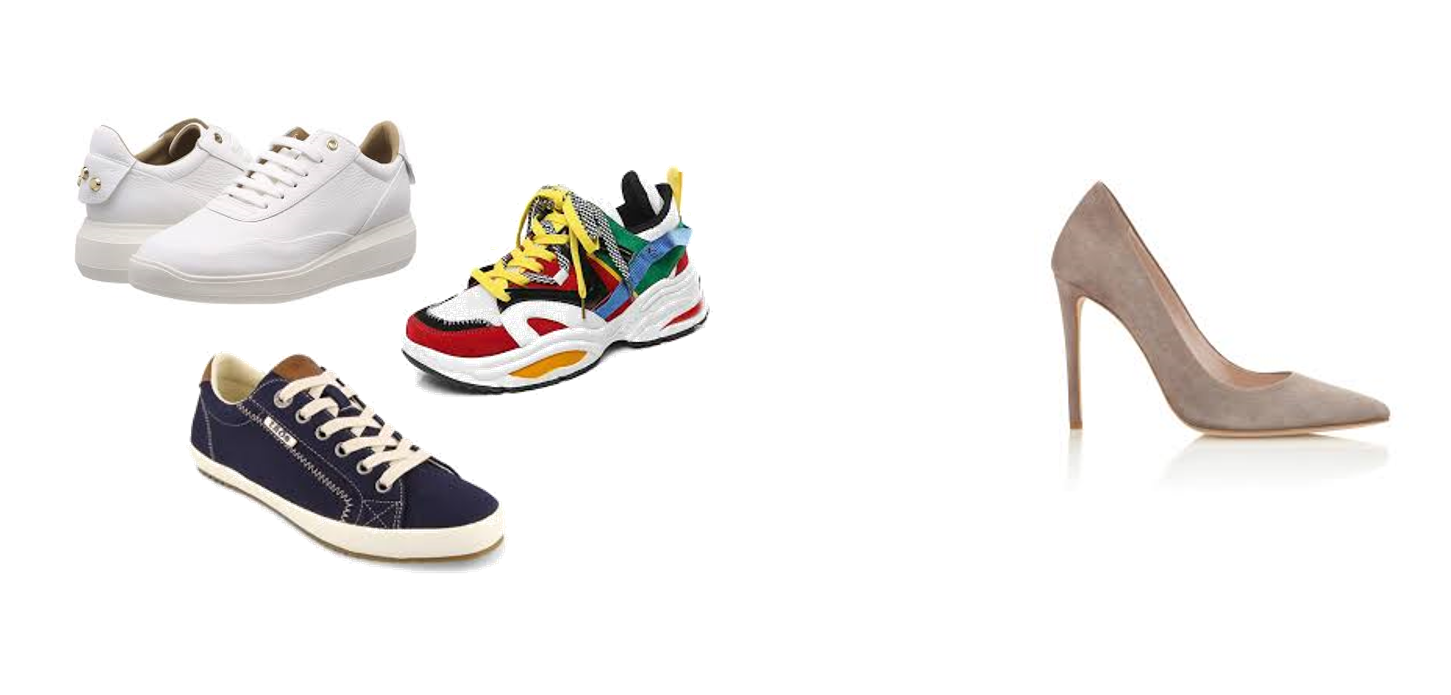

또한, 훈련 과정에서 왼쪽의 고양이 이미지들을 학습한 후에 오른쪽의 누워있는 고양이의 이미지를 인식하지 못할 수 있습니다.

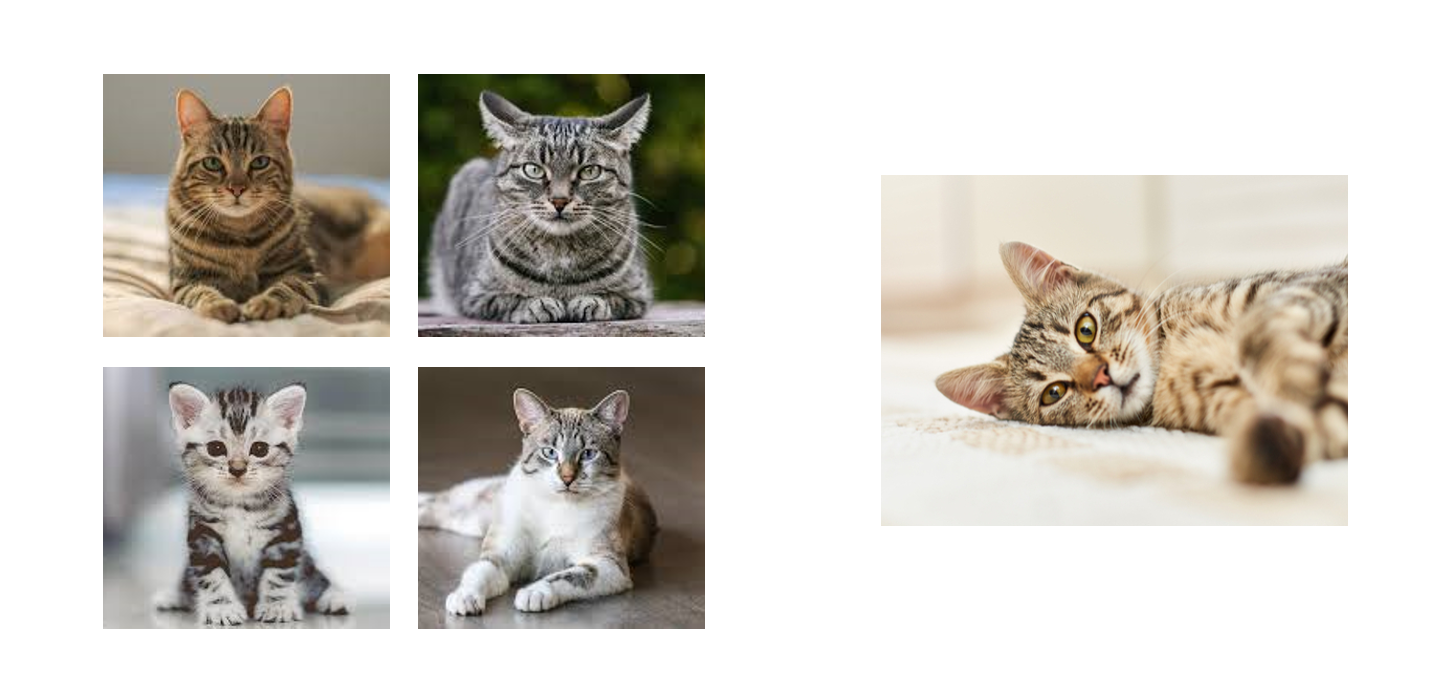

이미지 어그멘테이션(Image augmentation)은 이미지 인식에 있어서 과적합 문제를 해결하기 위한 매우 간단하면서 강력한 이미지 전처리 기법입니다.

이미지 어그멘테이션 기법을 사용하면 훈련 과정에서 즉석해서 이미지를 회전(rotation)시키는 등의 변화를 적용합니다.

이 페이지에서는 이미지 어그멘테이션 기법을 이용해서 데이터를 전처리함으로써

적은 수의 이미지 데이터셋을 이용해서 이미지 인식의 정확도를 높이고 과적합 문제를 개선하는 과정에 대해 소개합니다.

## 다운로드하기

In [2]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-04-11 09:37:06--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   248MB/s    in 0.3s    

2022-04-11 09:37:06 (248 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## 압축풀기

In [3]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r') # 읽어오기 모드로 zip파일을 연 후

zip_ref.extractall('/tmp') # extractall()메서드로 tmp폴더에 압축을 풉니다.


## 경로 지정하기

In [10]:
# 기본 경로
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

/tmp/cats_and_dogs_filtered/train/cats
/tmp/cats_and_dogs_filtered/train/dogs
/tmp/cats_and_dogs_filtered/validation/cats
/tmp/cats_and_dogs_filtered/validation/dogs


## Kaggle Dogs Vs Cats 데이터셋 살펴보기

In [11]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
                            
print(train_cat_fnames)
print(train_dog_fnames)

['cat.997.jpg', 'cat.870.jpg', 'cat.520.jpg', 'cat.354.jpg', 'cat.80.jpg', 'cat.936.jpg', 'cat.932.jpg', 'cat.348.jpg', 'cat.688.jpg', 'cat.404.jpg', 'cat.848.jpg', 'cat.373.jpg', 'cat.255.jpg', 'cat.604.jpg', 'cat.905.jpg', 'cat.949.jpg', 'cat.877.jpg', 'cat.651.jpg', 'cat.263.jpg', 'cat.12.jpg', 'cat.75.jpg', 'cat.287.jpg', 'cat.318.jpg', 'cat.134.jpg', 'cat.727.jpg', 'cat.693.jpg', 'cat.94.jpg', 'cat.282.jpg', 'cat.339.jpg', 'cat.210.jpg', 'cat.317.jpg', 'cat.206.jpg', 'cat.664.jpg', 'cat.708.jpg', 'cat.915.jpg', 'cat.760.jpg', 'cat.556.jpg', 'cat.131.jpg', 'cat.484.jpg', 'cat.270.jpg', 'cat.724.jpg', 'cat.539.jpg', 'cat.584.jpg', 'cat.315.jpg', 'cat.441.jpg', 'cat.525.jpg', 'cat.207.jpg', 'cat.839.jpg', 'cat.577.jpg', 'cat.316.jpg', 'cat.881.jpg', 'cat.33.jpg', 'cat.800.jpg', 'cat.39.jpg', 'cat.201.jpg', 'cat.619.jpg', 'cat.309.jpg', 'cat.63.jpg', 'cat.127.jpg', 'cat.469.jpg', 'cat.45.jpg', 'cat.599.jpg', 'cat.243.jpg', 'cat.157.jpg', 'cat.277.jpg', 'cat.420.jpg', 'cat.867.jpg', 'c

In [12]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


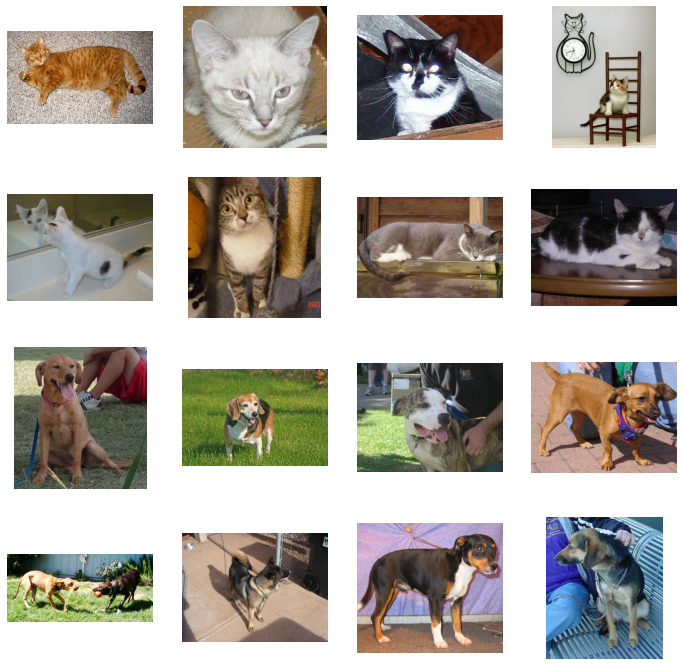

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf() # 이미 만들어진 배경을 로드
fig.set_size_inches(ncols*3, nrows*3) # 12*12 배경으로 설정

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off') # 축 제거

  img = mpimg.imread(img_path) # 경로 읽기
  plt.imshow(img)

plt.show()

## 모델 구성하기

In [14]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 16, kernel_size=(3,3), activation = tf.nn.relu, input_shape = (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation = tf.nn.relu),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation = tf.nn.relu),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

## 모델 컴파일

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', metrics = ['accuracy'], optimizer=RMSprop(lr=0.001))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


# 이미지 데이터 전처리하기

이미지 어그멘테이션을 위해서 이전의 예제에서 다루었던 tf.keras.preprocessing.image 모듈의 ImageDataGenerator 클래스를 수정합니다.

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1.0/255.)
train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

ImageDataGenerator 클래스의 rescale 파라미터의 값을 1.0/255.로 지정하면 모든 값을 255로 나누게 됩니다.

rotation_range는 이미지를 임의로 회전시키는 각도를 지정합니다. 0~180사이의 값을 입력합니다.

width_shift, height_shift는 이미지를 임의로 수직 또는 수평 방향으로 이동시키는 범위를 지정합니다. 이미지의 너비 또는 높이에 대한 비율로 지정합니다.

shear_range는 전단변환(shearing transformation)을 위한 파라미터입니다. 이미지를 어긋나 보이도록 변환합니다.

zoom_range는 이미지를 임의로 확대하는 정도를 지정합니다.

horizontal_flip은 이미지를 임의로 (수평방향으로) 뒤집을지 여부를 결정합니다.

fill_mode는 회전 또는 이동 변환 후 빈 픽셀을 채우는 방식을 지정합니다. 디폴트는 'nearest'이며, {'constant','nearest','reflect','wrap'} 중 하나의 값으로 지정합니다.

참고 링크 - https://keras.io/api/preprocessing/image/

In [18]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                              batch_size=20,
                                                              class_mode='binary',
                                                              target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


flow_from_directory()메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만듭니다.

첫번째 인자로 이미지들이 위치한 경로를 입력하고, batch_size, class_mode를 지정합니다.

target_size에 맞춰서 이미지의 크기가 조절됩니다.

In [27]:
history = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch=100, epochs = 10, validation_steps = 50, verbose=2)

Epoch 1/10
100/100 - 69s - loss: 0.6591 - accuracy: 0.6470 - val_loss: 0.6059 - val_accuracy: 0.6510 - 69s/epoch - 695ms/step
Epoch 2/10
100/100 - 68s - loss: 0.6063 - accuracy: 0.6775 - val_loss: 0.5952 - val_accuracy: 0.6740 - 68s/epoch - 679ms/step
Epoch 3/10
100/100 - 67s - loss: 0.6089 - accuracy: 0.6760 - val_loss: 0.5550 - val_accuracy: 0.7070 - 67s/epoch - 668ms/step
Epoch 4/10
100/100 - 67s - loss: 0.6000 - accuracy: 0.6725 - val_loss: 0.5899 - val_accuracy: 0.6660 - 67s/epoch - 674ms/step
Epoch 5/10
100/100 - 67s - loss: 0.6123 - accuracy: 0.6700 - val_loss: 0.5498 - val_accuracy: 0.7160 - 67s/epoch - 673ms/step
Epoch 6/10
100/100 - 68s - loss: 0.6234 - accuracy: 0.6790 - val_loss: 0.5651 - val_accuracy: 0.7120 - 68s/epoch - 682ms/step
Epoch 7/10
100/100 - 68s - loss: 0.5786 - accuracy: 0.6895 - val_loss: 0.5476 - val_accuracy: 0.7250 - 68s/epoch - 680ms/step
Epoch 8/10
100/100 - 69s - loss: 0.5792 - accuracy: 0.7180 - val_loss: 0.5305 - val_accuracy: 0.7210 - 69s/epoch - 688

훈련과 테스트를 위한 데이터 셋인 train_generator, validation_generator를 입력합니다.

epochs는 데이터셋을 한번 훈련하는 과정을 의미합니다.

steps_per_epochs는 한 번 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수를 지정합니다.

validation_steps는 한 번 에포크가 끝날때 테스트에 사용되는 배치(batch)의 개수를 지정합니다.

# 정확도와 손실 확인하기

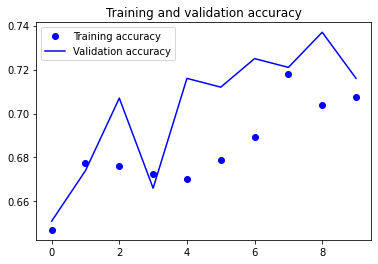

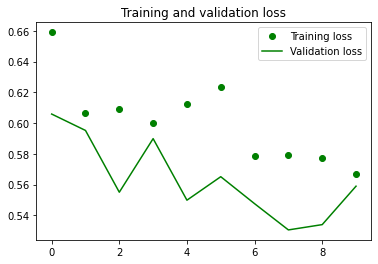

In [28]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

이미지 어그멘테이션(Image augmentation)을 사용하지 않았던 결과와 비교해보면,

훈련 데이터와 테스트 데이터에 대한 정확도, 손실 값이 일치하는 경향을 보이고, 과적합(overfitting)현상이 두드러지게 감소했음을 알 수 있습니다.

또한 이미지 어그멘테이션 과정에서 이미지 변환의 임의성(Randomness)이 반영되어서 최종 정확도(약 0.80)는 이미지 어그멘테이션을 사용하지 않은 경우의 훈련 데이터에 대한 정확도 (약1.0)보다는 감소했음을 알 수 있습니다.

이미지 어그멘테이션 기법을 적용하면 메모리 저장 공간을 차지하지 않고, 적은 수의 이미지 데이터로 매우 다양한 훈련 데이터를 사용하는 효과가 있습니다. 하지만 훈련 과정에서 즉시 이미지 프로세싱이 이루어지기 때문에 훈련 시간이 증가하게 됩니다.